In-class exercise 4.2
UW AMATH 301 - Jakob Kotas

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import KroghInterpolator

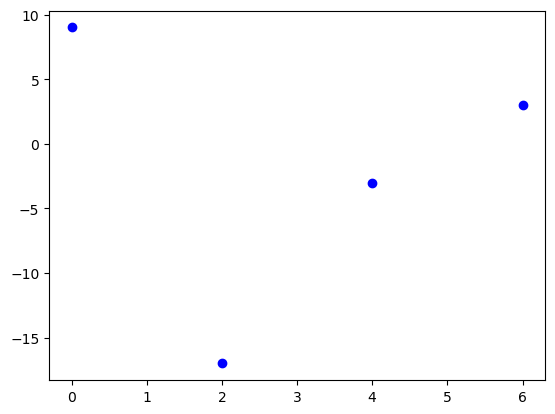

In [129]:
#1(a)
xvec = np.array([0,2,4,6])
yvec = np.array([9,-17,-3,3])

plt.plot(xvec,yvec,'bo')

In [43]:
#1(b)

A=np.vstack([xvec**0,xvec**1,xvec**2,xvec**3]).T
print(A)

avec = np.linalg.solve(A,yvec)
print('y =',avec[0],' +',avec[1],'x +',avec[2],'x^2 +',avec[3],'x^3')

[[  1   0   0   0]
 [  1   2   4   8]
 [  1   4  16  64]
 [  1   6  36 216]]
y = 9.0  + -31.00000000000001 x + 11.0 x^2 + -0.9999999999999998 x^3


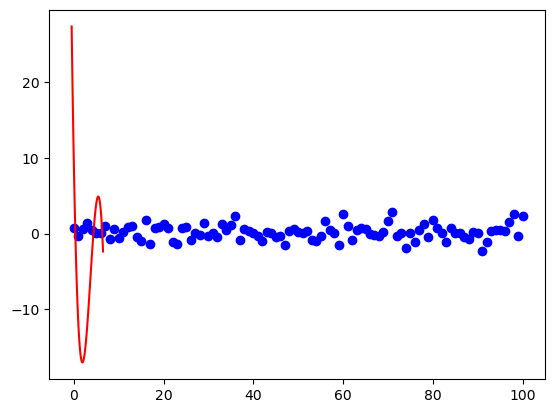

In [145]:
#1(d)

def p3(x):
    return -x**3+11*x**2-31*x+9

xx = np.arange(-0.5,6.55,0.1)

plt.plot(xvec,yvec,'bo')
plt.plot(xx,p3(xx),'-r')

#1(e)
#ki = KroghInterpolator(xvec,yvec)
#plt.plot(xx,ki.__call__(xx),'-m')

[ 1.00000000e+00  3.69642857e+00 -2.22044605e-16 -1.69642857e+00
  3.00000000e+00 -1.39285714e+00 -5.08928571e+00  3.48214286e+00
 -8.88178420e-16 -1.12500000e+00  5.35714286e+00 -3.23214286e+00
  1.00000000e+00 -1.07142857e-01 -4.33928571e+00  1.44642857e+00]


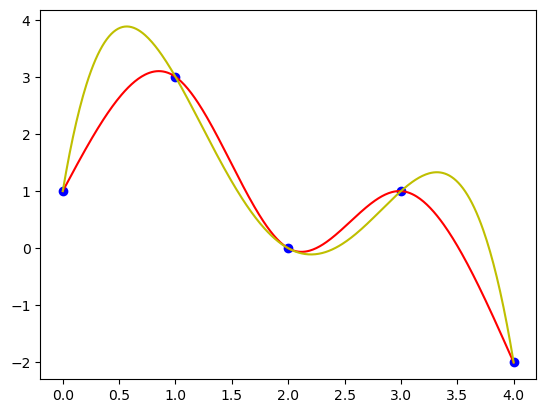

In [147]:
#2(a)

xvec=np.array([0,1,2,3,4])
yvec=np.array([1,3,0,1,-2])
plt.plot(xvec,yvec,'bo')

#(b)
M=np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
    [0,1,2,3,0,-1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,2,3,0,-1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,2,3,0,-1,0,0],
    [0,0,2,6,0,0,-2,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,2,6,0,0,-2,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,2,6,0,0,-2,0],
    [0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6]])
b=np.array([yvec[0],yvec[1],yvec[1],yvec[2],yvec[2],yvec[3],yvec[3],yvec[4],0,0,0,0,0,0,0,0])
c=np.linalg.solve(M,b)
print(c)

def spline(x):
    return ((x<1)*(c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)
            +((x>=1) & (x<2))*(c[4]+c[5]*(x-1)+c[6]*(x-1)**2+c[7]*(x-1)**3)
            +((x>=2) & (x<3))*(c[8]+c[9]*(x-2)+c[10]*(x-2)**2+c[11]*(x-2)**3)
            +(x>=3)*(c[12]+c[13]*(x-3)+c[14]*(x-3)**2+c[15]*(x-3)**3))

xx=np.arange(0,4.005,0.01)
plt.plot(xx,spline(xx),'-r')

#(c)
#cs = CubicSpline(xvec,yvec,bc_type='natural')
#plt.plot(xx,cs(xx),'-m')

#(d)
A=np.vstack([xvec**0,xvec**1,xvec**2,xvec**3,xvec**4]).T
avec = np.linalg.solve(A,yvec)

def interppoly(x):
    return avec[0]+avec[1]*x+avec[2]*x**2+avec[3]*x**3+avec[4]*x**4

plt.plot(xx,interppoly(xx),'-y')


(-10.0, 10.0, -3.0, 3.0)

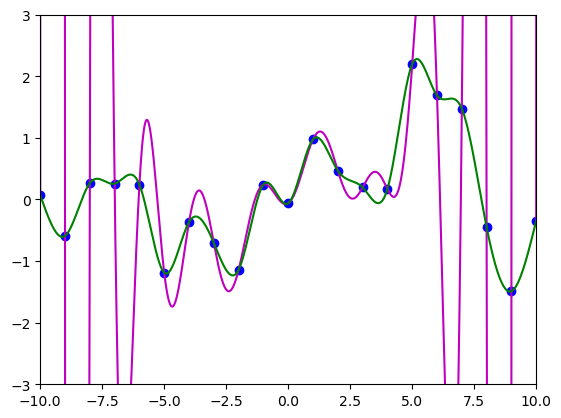

In [167]:
#3

xvec = np.arange(-10,11,1)
yvec = np.random.randn(21)
plt.plot(xvec,yvec,'bo')

xx = np.arange(-10,10.005,0.01)

ki = KroghInterpolator(xvec,yvec)
plt.plot(xx,ki.__call__(xx),'-m')

cs = CubicSpline(xvec,yvec,bc_type='natural')
plt.plot(xx,cs(xx),'-g')

plt.axis([-10,10,-3,3])